# Kullback–Leibler divergence
Here, we compare two PDFs or a field of PDFs using the [Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence). In the context of machine learning, ${\displaystyle D_{\text{KL}}(P\parallel Q)}$ is often called the information gain achieved if ${\displaystyle P}$ would be used instead of ${\displaystyle Q}$ which is currently used. By analogy with information theory, it is called the relative entropy of ${\displaystyle P}$ with respect to ${\displaystyle Q}$.

One might be tempted to call relative entropy a "distance metric" on the space of probability distributions, but this would not be correct as it is not symmetric – that is, ${\displaystyle D_{\text{KL}}(P\parallel Q)\neq D_{\text{KL}}(Q\parallel P)}$ – nor does it satisfy the triangle inequality. It generates a topology on the space of probability distributions. 

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import utils

# 1D

Let $X$ ~ $N(\mu_x, \sigma_x^2)$ and $Y$ ~ $N(\mu_y, \sigma_y^2)$ be two random variables, of a normal distribution $p(x)$ and $q(x)$ on the same space $X$. We can compare their Kullback–Leibler divergence as followed:
$$
    D_{KL}(p \parallel q) = \sum\limits_{x \in X} p(x) \log \left( \frac{p(x)}{q(x)} \right) \\
    D_{KL}(p \parallel q) = - \sum\limits_{x \in X} p(x) \log \left( \frac{q(x)}{p(x)} \right)
$$
For normal distributions, the closed form can be used:
$$
    D_{KL}( \mathcal{N}_0(\mu_0, \sigma_0) \parallel \mathcal{N}_1(\mu_1, \sigma_1) ) = \frac{1}{2} \left[ \left( \frac{\sigma_0}{\sigma_1} \right)^2 + \frac{ (\mu_1 - \mu_0)^2 }{\sigma_1^2} -1 + 2 \ln \frac{\sigma_1}{\sigma_0} \right]
$$
For multivariate nornal distributions, the closed form can be used:
$$
    D_{KL} \left( \mathcal{N}_0 \parallel \mathcal{N}_1 \right) = \frac{1}{2} \left(
        \operatorname{tr} \left( \Sigma^{-1}_1 \Sigma_0 \right)
        + (\mu_1 - \mu_0)^T \Sigma^{-1}_1 (\mu_1 - \mu_0)
        - k + \ln \left( \frac{\det \Sigma_1}{\det \Sigma_0} \right)
    \right)
$$

In [4]:
def normal_dist(x , mean , var):
    return 1 / np.sqrt(2*np.pi * var) * np.exp(-0.5*(x-mean)**2/var)

def kullback(mu0, var0, mu1, var1):
    return 0.5 * (
        var0 / var1 + (mu1 - mu0)**2 / var1 - 1 + 2 * np.log( np.sqrt(var1 / var0) )
    )

0.0


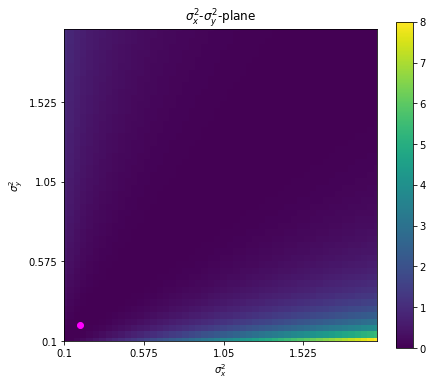

In [33]:
max_mu = 6.0
max_sigma = 2.0

def show_kullback_mu(mu_x = 0.0, var_x = 0.1, mu_y = 0.0, var_y = 0.6, max_mu=max_mu, max_sigma=max_sigma):
    mu1 = np.linspace(0, max_mu)
    mu2 = np.linspace(0, max_mu)
    
    mu11, mu22 = np.meshgrid(mu1, mu2)
    
    BD_mu = kullback(mu11, var_x, mu22, var_y)
    print(kullback(mu_x, var_x, mu_y, var_y))
    
    plt.figure(figsize=(7,6))
    plt.title(r'$\mu_x$-$\mu_y$-plane')
    plt.imshow(BD_mu)
    plt.colorbar()
    plt.scatter(mu_x/max_mu * (len(mu1)-1), mu_y/max_mu * (len(mu2)-1), c='magenta')
    plt.xlabel(r'$\mu_x$')
    plt.ylabel(r'$\mu_y$')
    plt.xticks(np.linspace(0, len(mu1), 5), np.linspace(mu1[0], mu1[-1], 5))
    plt.yticks(np.linspace(0, len(mu2), 5), np.linspace(mu2[0], mu2[-1], 5))
    plt.xlim(0,len(mu1)-1)
    plt.ylim(0,len(mu2)-1)
    
    plt.show()
    
def show_kullback_sigma(mu_x = 0.0, var_x = 0.1, mu_y = 0.0, var_y = 0.6, max_mu=max_mu, max_sigma=max_sigma):
    var1 = np.linspace(0.1, max_sigma)
    var2 = np.linspace(0.1, max_sigma)
    
    var11, var22 = np.meshgrid(var1, var2)
    
    BD_var = kullback(mu_x, var11, mu_y, var22)
    print(kullback(mu_x, var_x, mu_y, var_y))
    
    plt.figure(figsize=(7,6))
    plt.title(r'$\sigma_x^2$-$\sigma_y^2$-plane')
    plt.imshow(BD_var)
    plt.colorbar()
    plt.scatter(var_x / max_sigma * (len(var1)-1), var_y / max_sigma * (len(var2)-1), c='magenta')
    plt.xlabel(r'$\sigma_x^2$')
    plt.ylabel(r'$\sigma_y^2$')
    plt.xticks(np.linspace(0, len(var1), 5), np.linspace(var1[0], var1[-1], 5))
    plt.yticks(np.linspace(0, len(var2), 5), np.linspace(var2[0], var2[-1], 5))
    plt.xlim(0,len(var1)-1)
    plt.ylim(0,len(var2)-1)
    plt.show()
    
def show_pdfs(mu_x = 0.0, var_x = 0.1, mu_y = 0.0, var_y = 0.6, max_mu=max_mu):
    space = np.linspace(0, max_mu, 200)
    
    x = normal_dist(space, mu_x, var_x)
    y = normal_dist(space, mu_y, var_y)
    
    plt.figure(figsize=(18,6))
    plt.plot(space, x)
    plt.plot(space, y)
    plt.xlim(0,max_mu)
    plt.ylim(0,4)
    plt.show()
    
mu_x_widget = widgets.FloatSlider(
    value=0,
    min=0,
    max=max_mu,
    step=0.1,
    description=r'$\mu_x$:',
    layout=widgets.Layout(left='70px', width='395px')
)

mu_y_widget = widgets.FloatSlider(
    value=0,
    min=0,
    max=max_mu,
    step=0.1,
    orientation='vertical',
    description=r'$\mu_y$:',
    layout=widgets.Layout(left='0px', height='355px')
)

var_x_widget = widgets.FloatSlider(
    value=0.1,
    min=0.1,
    max=max_sigma,
    step=0.1,
    description=r'$\sigma_x^2$:',
    layout=widgets.Layout(left='70px', width='405px')
)

var_y_widget = widgets.FloatSlider(
    value=0.1,
    min=0.1,
    max=max_sigma,
    step=0.1,
    orientation='vertical',
    description=r'$\sigma_y^2$:',
    layout=widgets.Layout(top='0px', height='355px')
)

sigma_interact = widgets.interactive_output(show_kullback_sigma, {
    'mu_x': mu_x_widget,
    'var_x': var_x_widget,
    'mu_y': mu_y_widget,
    'var_y': var_y_widget
})

mu_interact = widgets.interactive_output(show_kullback_mu, {
    'mu_x': mu_x_widget,
    'var_x': var_x_widget,
    'mu_y': mu_y_widget,
    'var_y': var_y_widget
})

mu_interact_inverse = widgets.interactive_output(show_kullback_mu, {
    'mu_x': mu_y_widget,
    'var_x': var_y_widget,
    'mu_y': mu_x_widget,
    'var_y': var_x_widget
})

sigma_interact_inverse = widgets.interactive_output(show_kullback_sigma, {
    'mu_x': mu_y_widget,
    'var_x': var_y_widget,
    'mu_y': mu_x_widget,
    'var_y': var_x_widget
})

pdf_interact = widgets.interactive_output(show_pdfs, {
    'mu_x': mu_x_widget,
    'var_x': var_x_widget,
    'mu_y': mu_y_widget,
    'var_y': var_y_widget
})

layout = widgets.HBox([
    widgets.VBox([
        mu_x_widget,
        widgets.HBox([
            mu_y_widget,
            mu_interact
        ])
    ]),
    widgets.VBox([
        var_x_widget,
        widgets.HBox([
            var_y_widget,
            sigma_interact
        ])
    ])
])

layout2 = widgets.HBox([
    widgets.VBox([
        widgets.HTML('<h2>Inverse</h2>'),
        mu_interact_inverse
    ]),
    widgets.VBox([
        sigma_interact_inverse
    ], layout=widgets.Layout(top='60px' , left='70px'))
], layout=widgets.Layout(left= '30px'))

display(widgets.VBox([
    layout,
    widgets.HTML('<hr />'),
    pdf_interact
]))

# 2D

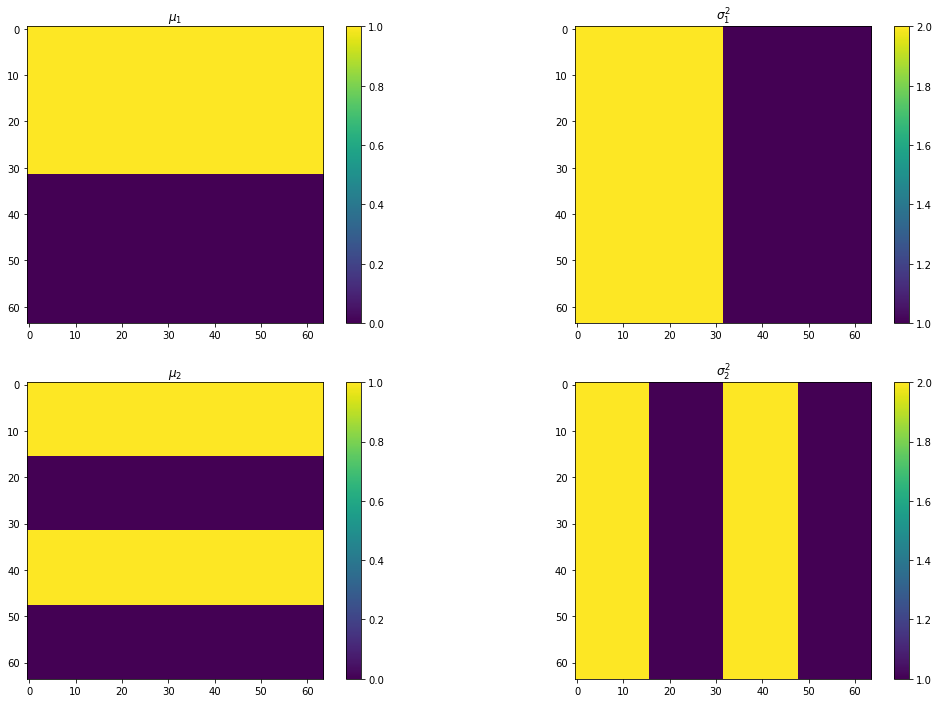

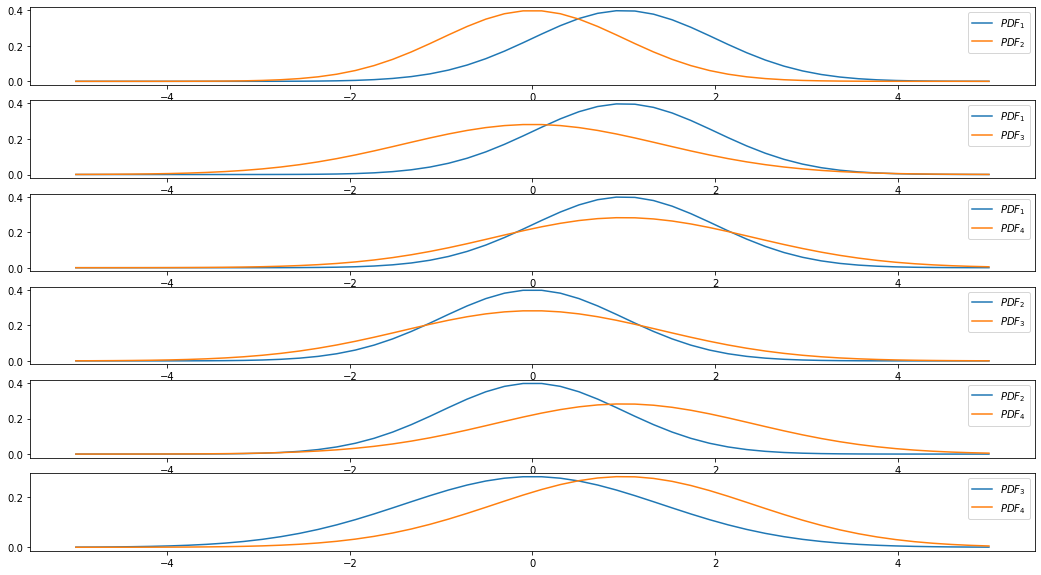

In [35]:
mu1 = np.zeros((64,64))
mu1[:32,:] = 1.0
var1 = np.ones((64,64))
var1[:,:32] = 2.0

mu2 = np.zeros((64,64))
mu2[:32,:32] = mu1[16:48,16:48]
mu2[32:,:32] = mu1[16:48,16:48]
mu2[32:,32:] = mu1[16:48,16:48]
mu2[:32,32:] = mu1[16:48,16:48]

var2 = np.ones((64,64))
var2[:32,:32] = var1[16:48,16:48]
var2[32:,:32] = var1[16:48,16:48]
var2[32:,32:] = var1[16:48,16:48]
var2[:32,32:] = var1[16:48,16:48]

plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.title(r'$\mu_1$')
plt.imshow(mu1)
plt.colorbar()

plt.subplot(2,2,2)
plt.title(r'$\sigma_1^2$')
plt.imshow(var1)
plt.colorbar()

plt.subplot(2,2,3)
plt.title(r'$\mu_2$')
plt.imshow(mu2)
plt.colorbar()

plt.subplot(2,2,4)
plt.title(r'$\sigma_2^2$')
plt.imshow(var2)
plt.colorbar()

plt.show()

x = np.linspace(-5,5)

pdf1 = normal_dist(x, 1, 1)
pdf2 = normal_dist(x, 0, 1)
pdf3 = normal_dist(x, 0, 2)
pdf4 = normal_dist(x, 1, 2)

plt.figure(figsize=(18,10))
plt.subplot(6,1,1)
plt.plot(x, pdf1, label=r'$PDF_1$')
plt.plot(x, pdf2, label=r'$PDF_2$')
plt.legend()
plt.subplot(6,1,2)
plt.plot(x, pdf1, label=r'$PDF_1$')
plt.plot(x, pdf3, label=r'$PDF_3$')
plt.legend()
plt.subplot(6,1,3)
plt.plot(x, pdf1, label=r'$PDF_1$')
plt.plot(x, pdf4, label=r'$PDF_4$')
plt.legend()
plt.subplot(6,1,4)
plt.plot(x, pdf2, label=r'$PDF_2$')
plt.plot(x, pdf3, label=r'$PDF_3$')
plt.legend()
plt.subplot(6,1,5)
plt.plot(x, pdf2, label=r'$PDF_2$')
plt.plot(x, pdf4, label=r'$PDF_4$')
plt.legend()
plt.subplot(6,1,6)
plt.plot(x, pdf3, label=r'$PDF_3$')
plt.plot(x, pdf4, label=r'$PDF_4$')
plt.legend()
plt.show()

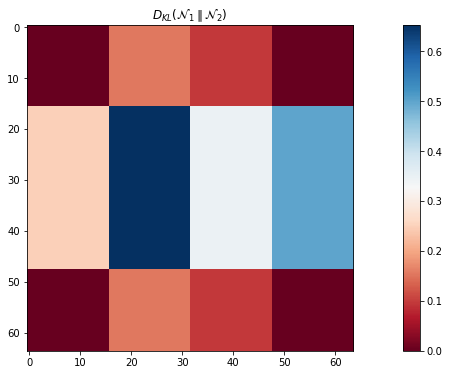

In [38]:
diff = kullback(mu1, var1, mu2, var2)

plt.figure(figsize=(18,6))
plt.title(r'$D_{KL}( \mathcal{N}_1 \parallel \mathcal{N}_2 )$')
plt.imshow(diff, cmap='RdBu')
plt.colorbar()
plt.show()

In [10]:
width = 10
percent = 5
 
input_range = 8649.794 # max - min value of sinogram
var = np.ones((64,64)) * input_range * percent*1e-2
Sigma_in = utils.build_covariance_matrix(var, function=utils.exponential, width=width)

algs = ['ramp', 'cosine', 'hamming', 'hann', 'shepp-logan']

@widgets.interact(algo1=algs, algo2=algs)
def compare(algo1='ramp', algo2='cosine'):
    mu1 = np.load('../../Data/iradon/mu_'+algo1+'.npy')
    df_dx1 = np.abs(np.load('../../Data/iradon/df_dx_'+algo1+'.npy'))
    Sigma1 = df_dx1 @ Sigma_in @ np.transpose(df_dx1)
    variance1 = np.reshape(np.abs(np.diagonal(Sigma1)), mu1.shape)
    
    mu2 = np.load('../../Data/iradon/mu_'+algo2+'.npy')
    df_dx2 = np.abs(np.load('../../Data/iradon/df_dx_'+algo2+'.npy'))
    Sigma2 = df_dx2 @ Sigma_in @ np.transpose(df_dx2)
    variance2 = np.reshape(np.abs(np.diagonal(Sigma2)), mu2.shape)
    
    BD = kullback(mu1, variance1, mu2, variance2)
    
    plt.figure(figsize=(18,6))
    plt.suptitle(algo1)
    plt.subplot(1,2,1)
    plt.imshow(mu1)
    plt.colorbar()

    plt.subplot(1,2,2)
    plt.imshow(variance1)
    plt.colorbar()
    
    plt.show()
    
    plt.figure(figsize=(18,6))
    plt.suptitle(algo2)
    plt.subplot(1,2,1)
    plt.imshow(mu2)
    plt.colorbar()

    plt.subplot(1,2,2)
    plt.imshow(variance2)
    plt.colorbar()
    
    plt.show()
    
    plt.figure(figsize=(18,6))
    plt.suptitle('difference')
    plt.subplot(1,2,1)
    plt.imshow(BD)
    plt.colorbar()
    
    plt.show()

interactive(children=(Dropdown(description='algo1', options=('ramp', 'cosine', 'hamming', 'hann', 'shepp-logan…